In [ ]:
# CALUCLATE INDICES
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('Cerro_Gordo_daily_weather.csv', sep=',',header=0)
for i in range(0, data.shape[0]):
    data.iloc[i,0] = datetime.strptime(data.iloc[i,0], "%Y-%m-%d")

In [ ]:
# Calculate sensitivity for summer days, heat wave index, longest wet spell and 95th precentile precip
years=list(range(1940,2016))

# Statistics for base period (1961 - 1990)
start_year = 1961; end_year=1990
base_period = data[(data.iloc[:,0].dt.year>=start_year) & (data.iloc[:,0].dt.year<=end_year)]
Tmax_90p = base_period.iloc[:,2].quantile(q=0.9)
Tmin_10p = base_period.iloc[:,3].quantile(q=0.1)

In [ ]:
def calc_summer_days(temp):
  Summer_days=[]
  for year in years:
    year_slice = data[data.iloc[:,0].dt.year==year].reset_index(drop=True)
    sdays=0
    for i in range(0, year_slice.shape[0]):
        if year_slice.iloc[i,2] > temp:
            sdays = sdays + 1
    Summer_days.append(sdays)
  return(Summer_days)

def calc_pcrp95ptile(ptile):
  Precip_95ptile=[]
  for year in years:
    year_slice = data[data.iloc[:,0].dt.year==year].reset_index(drop=True)
    precip_ptile = base_period.iloc[:,1].quantile(q=ptile)
    n_days = 0
    for i in range(0, year_slice.shape[0]):
        if year_slice.iloc[i,1] > precip_ptile:
            n_days += 1
    Precip_95ptile.append(n_days)
  return(Precip_95ptile)

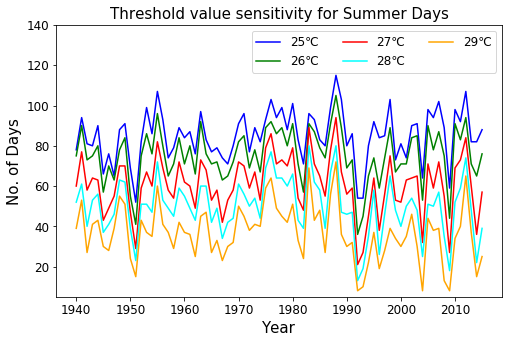

In [ ]:
# Extreme indices
temp_range=np.arange(25,30,1)
temp_labels = [u"25\u2103", u"26\u2103", u"27\u2103", u"28\u2103", u"29\u2103"]
colors = ["blue","green","red","cyan","orange"]
fig,ax = plt.subplots(figsize=(8,5))
for i in range(0, len(temp_range)):
    temp = temp_range[i]
    Summer_days = calc_summer_days(temp)
    ax.plot(list(range(1940,2016)),Summer_days,color=colors[i], label=temp_labels[i])
ax.set_title("Threshold value sensitivity for Summer Days", fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("No. of Days", fontsize=15)
ax.legend(ncol=3, fontsize=12)
ax.set_ylim(5,140)
plt.savefig("summer_days_sensitivity.png")

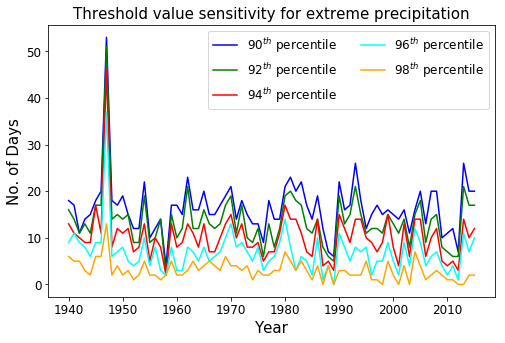

In [ ]:
# Extreme indices
ptile_range = [0.9,0.92,0.94,0.96,0.98]
ptile_labels = ['90$^{th}$ percentile','92$^{th}$ percentile','94$^{th}$ percentile','96$^{th}$ percentile','98$^{th}$ percentile']
colors = ["blue","green","red","cyan","orange"]
fig,ax = plt.subplots(figsize=(8,5))
for i in range(0, len(temp_range)):
    ptile = ptile_range[i]
    Precip_95ptile = calc_pcrp95ptile(ptile)
    ax.plot(list(range(1940,2016)),Precip_95ptile,color=colors[i], label=ptile_labels[i])
ax.set_title("Threshold value sensitivity for extreme precipitation", fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("No. of Days", fontsize=15)
ax.legend(ncol=2, fontsize=12)
plt.savefig("extreme_prcp_sensitivity.png")